# Wine data classification & DL 

## import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## 데이터 전처리 및 스케일링

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


Wine
2    71
1    59
3    48
Name: count, dtype: int64




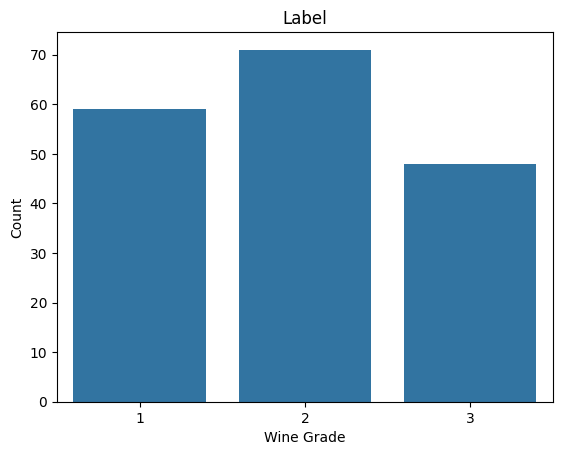



(142, 13)
(36, 13)
(142,)
(36,)


In [45]:
# 범주형 label(Wine이 1인지 2인지 3인지) 예측하는 것이므로 (삼진)분류 문제이다.

file_path = "https://github.com/MyungKyuYi/AI-class/raw/main/wine.csv"
df = pd.read_csv(file_path)

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(df['Wine'].value_counts())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (그래프)
sns.countplot(data = df, x="Wine")
plt.xlabel("Wine Grade")
plt.ylabel("Count")
plt.title("Label")
plt.show()

# 모든 데이터들이 숫자이기 때문에 Encoding을 할 필요가 없다.

# X와 Y 분할
X = df.drop('Wine', axis=1) # Feature
Y = df['Wine'] # Label

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print("\n=====================================================\n")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## 결정 트리 (Decision Tree) 



Decision Tree Accuracy: 0.9444444444444444

Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

DT Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
최고 정확도: 0.9290476190476191
테스트 데이터 정확도: 0.9444444444444444
Best Decision Tree Accuracy: 0.9444444444444444

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.93      1.00      0.97        14
           3       1.00      0.75      0.86         8

    ac

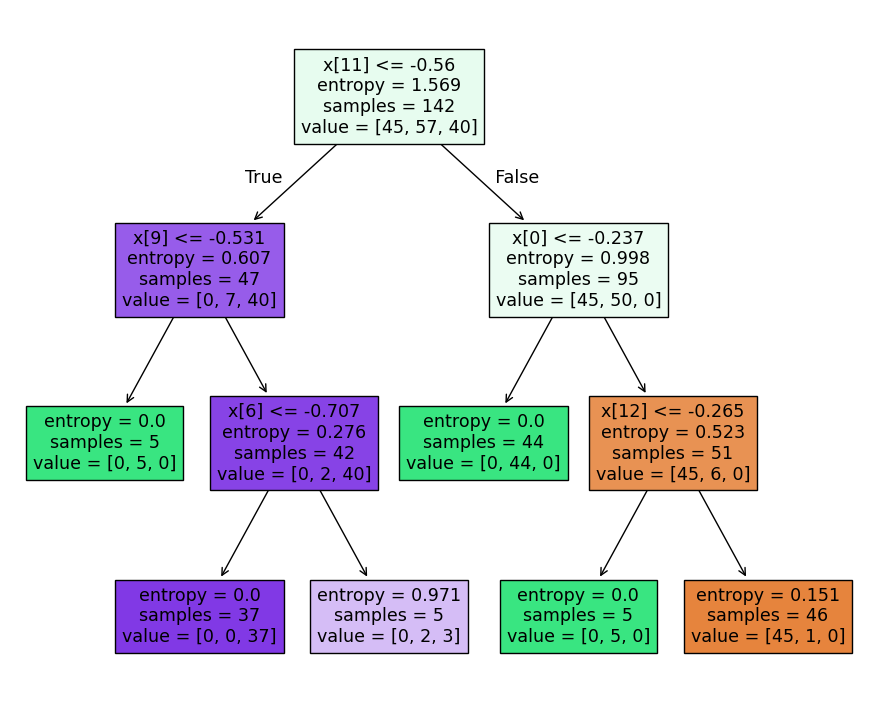

In [48]:
# Decision Tree (DT)
print("\n=====================================================\n")
dt_model = DecisionTreeClassifier() # DT 모델 생성.
dt_model.fit(X_train, Y_train) # 모델 학습.
dt_predictions = dt_model.predict(X_test) # 예측. 즉, dt_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nDecision Tree Classification Report:\n", classification_report(Y_test, dt_predictions, zero_division=1))
print("DT Confusion Matrix:\n", confusion_matrix(Y_test, dt_predictions)) # 혼동 행렬 출력

# 하이터파라미터 튜닝
param_grid = {
    'max_depth': range(2, 8),  # 트리 최대 깊이
    'min_samples_split': range(2, 12),  # 최소 샘플 분할 기준
    'min_samples_leaf': range(2, 10),  # 리프 노드 최소 샘플 수
    'criterion': ['gini', 'entropy']  # 불순도 계산 방식
}

# 그리드 서치 실행
grid_search = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1) # cv=10 (10-Fold 교차 검증)
grid_search.fit(X_train, Y_train)  # 모델 학습

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적 모델 평가
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("테스트 데이터 정확도:", test_score)

# 최적의 하이퍼 파라미터 준비
best_param = grid_search.best_params_

# 최적의 DT 모델
dt_model = DecisionTreeClassifier(**best_param) # 결정트리 모델을 이번에는 최적의 하이퍼 파라미터를 주며 재생성
dt_model.fit(X_train, Y_train) # 모델 학습
dt_predictions = dt_model.predict(X_test) # 예측
# 최적의 하이퍼 파라미터를 준 DT 모델을 재평가
print("Best Decision Tree Accuracy:", accuracy_score(Y_test, dt_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nBest Decision Tree Classification Report:\n", classification_report(Y_test, dt_predictions, zero_division=1))
print("Best DT Confusion Matrix:\n", confusion_matrix(Y_test, dt_predictions)) # 혼동 행렬 출력

# 결정트리 시각화
plt.figure(figsize = (11, 9))
plot_tree(dt_model, filled = True)
plt.show()

## 랜덤 포레스트(RF) & 로지스틱 회귀(LR)

In [51]:
# Random Forest (RF)
print("\n=====================================================\n")
rf_model = RandomForestClassifier() # RF 모델 생성.
rf_model.fit(X_train, Y_train) # 모델 학습.
rf_predictions = rf_model.predict(X_test) # 예측. 즉, rf_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, rf_predictions, zero_division=1))
print("RF Confusion Matrix:\n", confusion_matrix(Y_test, rf_predictions)) # 혼동 행렬 출력

# Logistic Regression (LR)
print("\n=====================================================\n")
lr_model = LogisticRegression() # LR 모델 생성.
lr_model.fit(X_train, Y_train) # 모델 학습.
lr_predictions = lr_model.predict(X_test) # 예측. 즉, lr_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test, lr_predictions, zero_division=1))
print("LR Confusion Matrix:\n", confusion_matrix(Y_test, lr_predictions)) # 혼동 행렬 출력



Random Forest Accuracy: 1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

RF Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Logistic Regression Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

LR Confusion Matrix:
 [[14  0

## K-Nearest Neighbors (KNN)

In [54]:
# K-Nearest Neighbors (KNN)
print("\n=====================================================\n")
knn_model = KNeighborsClassifier(n_neighbors=5)  # 기본적으로 K=5 사용
knn_model.fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(Y_test, knn_predictions))
print("\nKNN Algorithm Classification Report:\n", classification_report(Y_test, knn_predictions, zero_division=1))
print("KNN Confusion Matrix:\n", confusion_matrix(Y_test, knn_predictions)) # 혼동 행렬 출력

# 하이퍼 파라미터 튜닝
param_grid = {
    'n_neighbors': range(2, 20)
}

# 그리드 서치 실행
grid_search = GridSearchCV(knn_model, param_grid, cv = 8, scoring='accuracy', n_jobs = -1) # 8-Fold 교차 검증
grid_search.fit(X_train, Y_train)  # 학습 수행

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적 모델 평가
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("테스트 데이터 정확도:", test_score)

# 최적의 하이퍼 파라미터 준비
best_param = grid_search.best_params_

# 최적의 KNN 알고리즘 
knn_model = KNeighborsClassifier(**best_param) # KNN 모델을 이번에는 최적의 하이퍼 파라미터를 주며 재생성
knn_model.fit(X_train, Y_train) # 모델 학습
knn_predictions = knn_model.predict(X_test) # 예측
# 최적의 하이퍼 파라미터를 준 DT 모델을 재평가
print("Best KNN Accuracy:", accuracy_score(Y_test, knn_predictions)) 
print("\nBest KNN Algorithm Classification Report:\n", classification_report(Y_test, knn_predictions, zero_division=1))
print("Best KNN Confusion Matrix:\n", confusion_matrix(Y_test, knn_predictions)) # 혼동 행렬 출력



KNN Accuracy: 0.9444444444444444

KNN Algorithm Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

KNN Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
최적의 하이퍼파라미터: {'n_neighbors': 8}
최고 정확도: 0.9652777777777778
테스트 데이터 정확도: 0.9722222222222222
Best KNN Accuracy: 0.9722222222222222

Best KNN Algorithm Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0

## 딥러닝

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559 (2.18 KB)

 Trainable params: 559 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4599 - loss: 3.7061 - val_accuracy: 0.6000 - val_loss: 1.6181
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5226 - loss: 1.4527 - val_accuracy: 0.4800 - val_loss: 1.3443
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6710 - loss: 0.8137 - val_accuracy: 0.5200 - val_loss: 1.1114
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6229 - loss: 0.8707 - val_accuracy: 0.5200 - val_loss: 1.0264
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6609 - loss: 0.7189 - val_accuracy: 0.5600 - val_loss: 0.9336
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6479 - loss: 0.7287 - val_accuracy: 0.6000 - val_loss: 0.9401
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7427 - loss: 0.5394 - val_accuracy: 0.6000 - val_loss: 0.9264
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7048 - loss: 0.6620 - val_accuracy: 0.6400 - val_loss: 0.9947


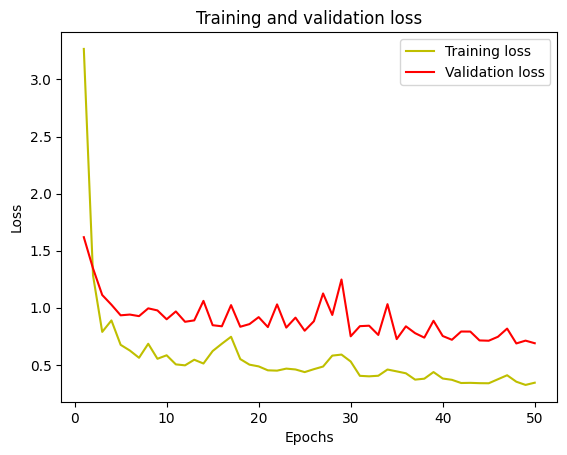

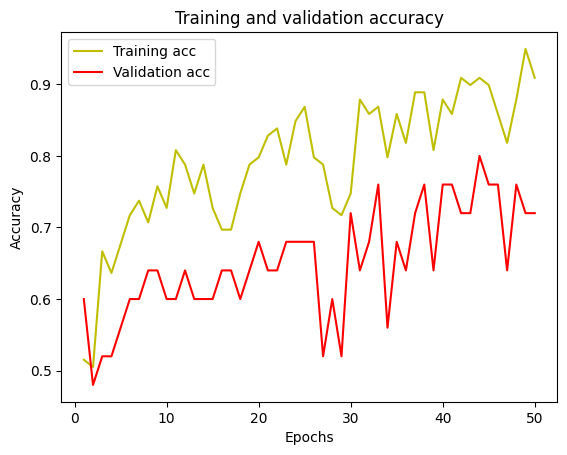



              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.66      0.95      0.78        22
           2       1.00      0.31      0.47        13

    accuracy                           0.76        54
   macro avg       0.85      0.70      0.70        54
weighted avg       0.82      0.76      0.73        54



[[16  3  0]
 [ 1 21  0]
 [ 1  8  4]]


In [57]:
# 딥러닝
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# Numpy 배열로 변환
X = X.values
Y = pd.get_dummies(Y).values # 다중분류이므로 One-Hot Encoding.

# 훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

model = Sequential() # 순차적인 모델. 각 층이 이전 층과 연결됨.

model.add(Dense(16,input_shape=(13,),activation='relu')) # 첫 번째 은닉층. 뉴런 개수 : 16, 입력 특성의 개수 : 13, 활성화 함수 : relu
# input_shape는 첫 번째 층에서만 설정해주면 된다.
model.add(Dense(12,activation='relu')) # 두 번째 은닉층. 뉴런 개수 : 12, 활성화 함수 : relu
model.add(Dense(8,activation='relu')) # 세 번째 은닉층. 뉴런 개수 : 8, 활성화 함수 : relu
model.add(Dense(3,activation='softmax')) # 3개 클래스 (다중 분류)를 예측하기 위한 출력층. 뉴런 개수 : 3
# Softmax 함수는 각 클래스의 확률을 구해주는 함수로, 다중 분류 문제에서 사용된다. 출력층의 값은 각 클래스에 대한 확률을 나타낸다.
# N진분류 문제이므로 Dense(N,activation='softmax') 사용. 이진분류인 경우 Dense(1, activation='sigmoid') 사용.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # 다중분류 문제이므로 categorical_crossentropy 사용.
# 이진분류 문제인 경우 binary_crossentropy 사용.
model.summary() # 모델 구조 출력

# 학습. 50번의 에폭 동안 학습 진행. 16개의 샘플씩 모델을 학습하고 가중치 업데이트. 훈련 데이터의 20%를 검증 데이터로 사용.
# 에폭: 모든 훈련 데이터를 한 번씩 학습하는 과정을 의미함.
model_history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split=0.2)

Y_pred = model.predict(X_test) # 예측. 각 클래스에 대한 확률 값을 예측한다.

# Y_test는 원-핫 인코딩된 실제 레이블이다.
# argmax를 사용하여 가장 큰 값을 가지는 인덱스를 반환하므로, 클래스 레이블을 찾는다. 예를 들어, [0, 1, 0]은 클래스 1로 변환됨.
Y_test_class = np.argmax(Y_test,axis=1)
# Y_pred는 각 클래스에 대한 확률이 포함되어 있다.
# argmax를 사용하여 확률이 가장 높은 클래스를 선택합니다. 예를 들어, [0.2, 0.7, 0.1]은 클래스 1로 예측됩니다.
Y_pred_class = np.argmax(Y_pred,axis=1)

# 에폭마다 훈련 손실과 검증 손실이 어떻게 달라지는지 시각화
loss = model_history.history['loss'] # 훈련 데이터에 대한 손실값
val_loss = model_history.history['val_loss'] # 검증 데이터에 대한 손실값
epochs = range(1, len(loss) + 1) # 에폭(학습 횟수)의 범위
plt.plot(epochs, loss, 'y', label='Training loss') # 노란색 : 훈련 손실
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 초록색 : 검증 손실
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

# 에폭마다 훈련 정확도와 검증 정확도가 어떻게 달라지는지 시각화
acc = model_history.history['accuracy'] # 훈련 정확도 : 모델이 훈련 데이터에서 예측을 얼마나 잘 했는지 나타냄.
val_acc = model_history.history['val_accuracy'] # 검증 정확도 : 모델이 검증 데이터에서 예측을 얼마나 잘 했는지 나타냄. 이 값은 모델의 일반화 성능을 확인하는 데 사용된다.
plt.plot(epochs, acc, 'y', label='Training acc') # 노란색 : 훈련 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc') # 초록색 : 검증 정확도
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
print(classification_report(Y_test_class, Y_pred_class)) # 정확도
print("\n=====================================================\n")
print(confusion_matrix(Y_test_class, Y_pred_class)) # 혼동 행렬